# Анализ продаж компьютерных игр для интернет-магазина N

## Описание проекта

Интернет-магазин N продает компьютерные игры по всему миру. На основе исторических данных о продажах необходимо выявить закономерности успешности игр для планирования рекламных кампаний на 2017 год.

**Период анализа:** данные до 2016 года (прогноз на 2017 год)

**Ключевые задачи:**
- Определить платформы и жанры с наибольшим потенциалом продаж
- Выявить влияние оценок пользователей и критиков на успех игры
- Составить портреты пользователей по регионам (NA, EU, JP)
- Проверить статистические гипотезы о различиях между платформами и жанрами

### Откройтие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 # прочитали csv-файл, разделили данные
data = pd.read_csv('games.csv')

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info() #основная информацию о датафрейме с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

### Подготовка данных

Переименование столбцов. Приведем к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()

In [5]:
# Преобразование типов
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')

# Преобразуем user_score
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype(float)

# Рейтинг — категориальный
data['rating'] = data['rating'].astype('category')

Тип данных был изменён в четырёх столбцах `year_of_release` и `critic_score `преобразованы в Int64, так как это целочисленные значения с возможными пропущенными данными NaN.  `user_score` — в float, поскольку оценки пользователей представлены как числа с плавающей точкой, а также содержат строки 'tbd', заменённые на NaN. `rating` преобразован в категориальный тип, так как содержит ограниченное количество уникальных значений, что позволяет сэкономить память и упростить анализ.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   Int64   
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(2), category(1), float64(5), object(3)
memory usage: 1.3+ MB


 Обработка дубликатов**

In [7]:
data.duplicated().sum()

0

Полных дубликатов строк нет.

In [8]:
print(data['name'].unique())
print()
print(data['platform'].unique())
print()
print(data['year_of_release'].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64


 Неявных дубликатов не видно.

In [9]:
# Создаём таблицу с количеством и долей пропущенных значений
omissions = pd.DataFrame({'Сумма пропусков': data.isna().sum(),'доля пропусков': data.isna().mean()})

# Сортировка по убыванию доли пропусков
omissions = omissions.sort_values(by='доля пропусков', ascending=False)
omissions

,Сумма пропусков,доля пропусков
user_score,9125,0.545917
critic_score,8578,0.513192
rating,6766,0.404786
year_of_release,269,0.016093
name,2,0.000120
genre,2,0.000120
platform,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000


Пропуски не заполнялись, так как без этих данных невозможно точно идентифицировать игру или её категорию. Такие строки рекомендуется удалить:

In [10]:
data = data.dropna(subset=['name', 'platform' ])


В столбце `year_of_release` замена (медиана/мода) исказит анализ, поэтому пропуски были удалены.

In [11]:
data = data.dropna(subset=['year_of_release'])

`critic_score` и `user_score` — числовые оценки,произведена замена на 0

In [12]:
data['user_score'] = data['user_score'].fillna(0)
data['critic_score'] = data['critic_score'].fillna(0)

так как пропуски рейтинга не всегда означает его отсутствие, следовательно их надо заполнить значением 'unknown' 

In [13]:
data['rating'] = data['rating'].cat.add_categories('NR').fillna('NR')


Пропуски в данных могли возникнуть по разным причинам: для year_of_release это могло быть связано с отменёнными проектами, утерянными данными по старым играм или ошибками парсинга; в genre пропуски могли появиться из-за ошибок ручного ввода или нестандартных гибридных жанров; critic_score и user_score часто отсутствуют у нишевых или малоизвестных игр, не получивших внимания критиков или игроков, а также из-за неполного сбора данных; что касается rating, пропуски могли образоваться из-за отсутствия официального рейтинга у инди-игр, региональных изданий или различий в системах классификации. В большинстве случаев пропуски носят системный характер (например, отсутствие оценок у определённых категорий игр) и не являются случайными, что важно учитывать при анализе, чтобы избежать искажения результатов.

 суммарные продажи во всех регионах

In [14]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Исследовательский анализ данных

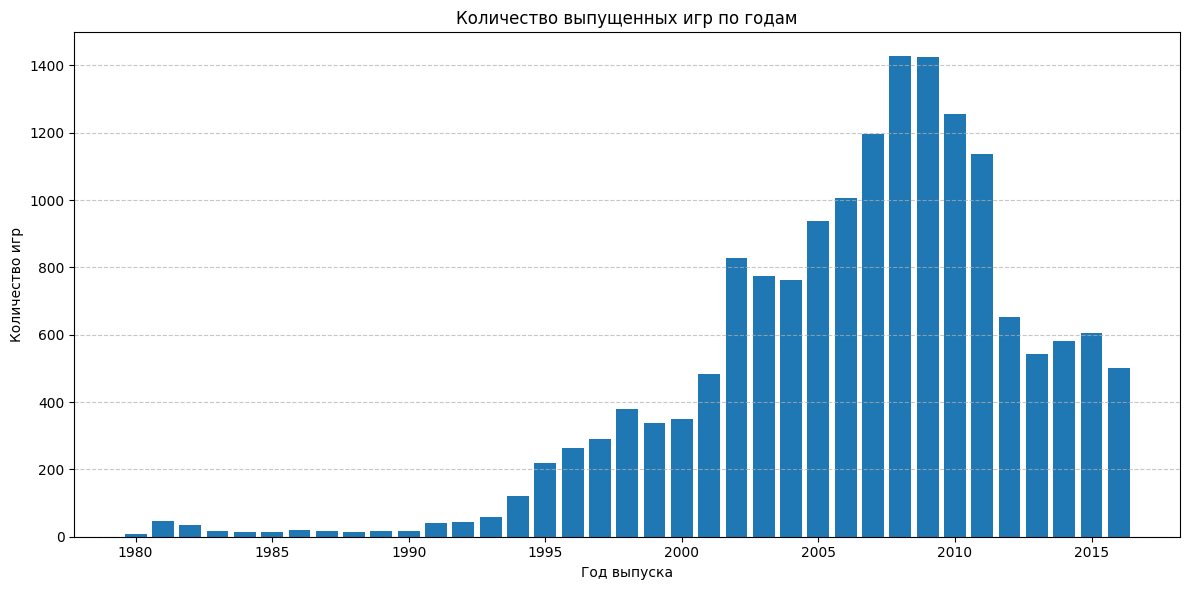

In [15]:
games = data['year_of_release'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(games.index, games.values)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр по годам')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Гистограмма, отражающая количество выпущенных игр по годам, показывает, что до середины 1990-х годов выходило сравнительно мало игр, и данные этого периода выглядят фрагментарно и неполными. С начала 2000-х индустрия видеоигр начала активно развиваться, а пик количества релизов пришёлся на 2008–2011 годы, когда ежегодно выходило более 1000 игр. После 2012 года наблюдается постепенное снижение количества выпускаемых игр, вероятно, из-за перехода к цифровым платформам и изменения способов распространения. Для анализа современных тенденций в игровой индустрии наиболее актуальными являются данные с 2000 по 2016 год, поскольку они наиболее полные и репрезентативные.

Найдём платформы с наибольшими суммарными продажами

In [16]:
top_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_platforms
#Это даст топ-10 самых продаваемых платформ.

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

<Figure size 1400x700 with 0 Axes>

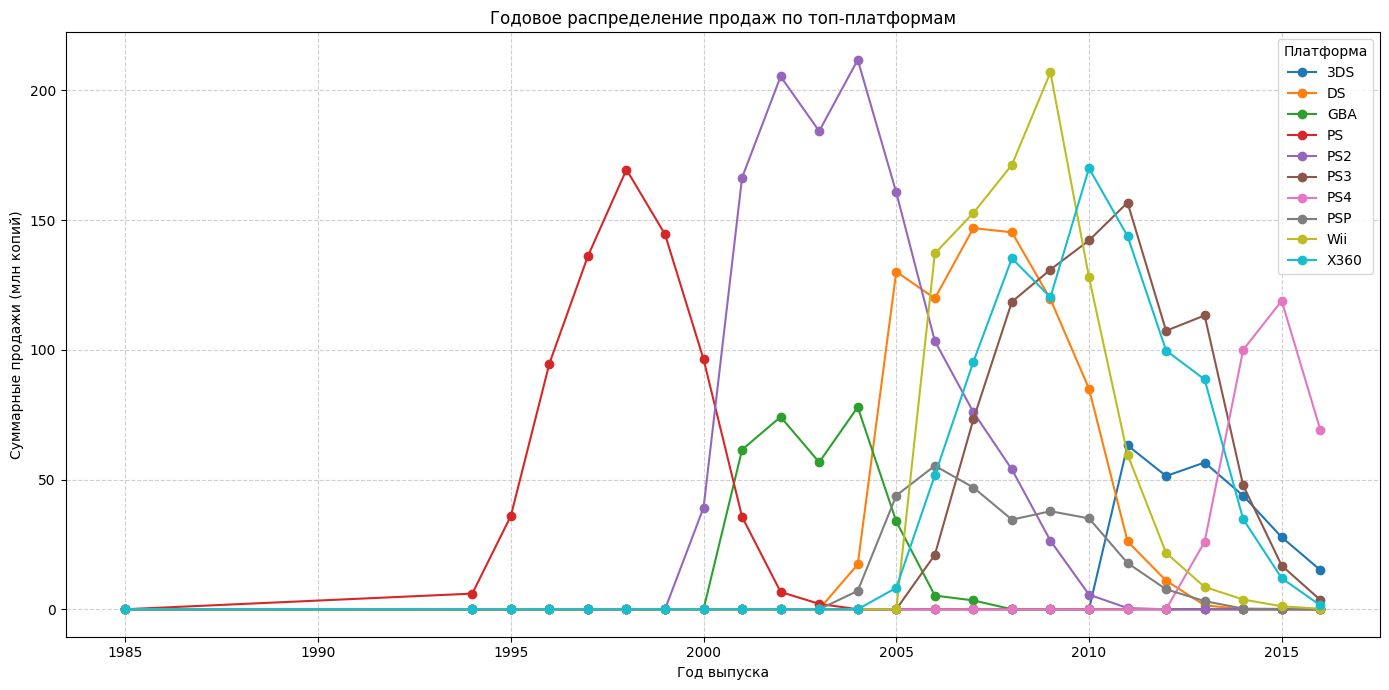

In [17]:
# Фильтруем данные по топ-платформам
top_platform_names = top_platforms.index.tolist()
df_top = data[data['platform'].isin(top_platform_names)].dropna(subset=['year_of_release'])

# Группируем данные по платформам и годам
platform_year_sales = df_top.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').fillna(0)

# Строим график
plt.figure(figsize=(14, 7))
platform_year_sales.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Годовое распределение продаж по топ-платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Платформа')
plt.tight_layout()
plt.show()


Средний срок жизни платформ - 5-6 лет. Новые появляются каждые 5-7 лет, с 1-2 годами переходного периода. Портативные консоли (DS, 3DS) живут дольше - до 8-9 лет. Современные платформы (PS4, XOne) устаревают быстрее после выхода новых поколений.

актуальный период

In [18]:
#actual = data[(data['year_of_release'] >= 2000) & (data['year_of_release'] <= 2016)]

actual = data[(data['year_of_release'] >= 2013) & (data['year_of_release'] <= 2016)]


In [19]:
platform_sales = actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales.head(10))


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64


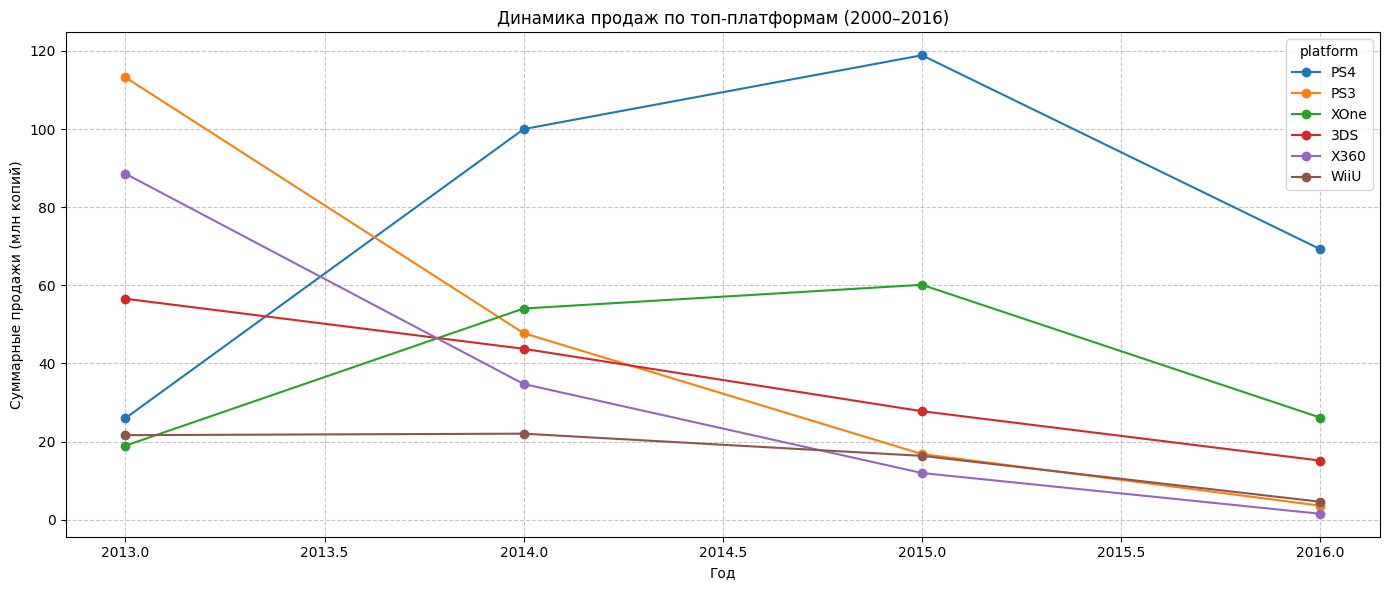

In [20]:
# Группируем продажи по платформам и годам
platform_trend = actual.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)


top_platforms = platform_sales.head(6).index  # Например, 6 платформ
platform_trend[top_platforms].plot(figsize=(14, 6), marker='o')
plt.title('Динамика продаж по топ-платформам (2000–2016)')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 Анализ данных показывает, что PS2 остаётся абсолютным лидером по продажам (1233,56 млн), но уже неактивна, тогда как PS4 (314,14 млн) демонстрирует устойчивый рост и является наиболее перспективной платформой для инвестиций. X360 (961,24 млн) сохраняет стабильные продажи, несмотря на возраст, а 3DS (257,81 млн) может быть интересна как нишевое решение, в то время как PS3, Wii и другие платформы находятся в стадии спада. Таким образом, для вложений стоит рассматривать PS4 как основной вариант, X360 — для умеренных инвестиций, и 3DS — для точечных решений.

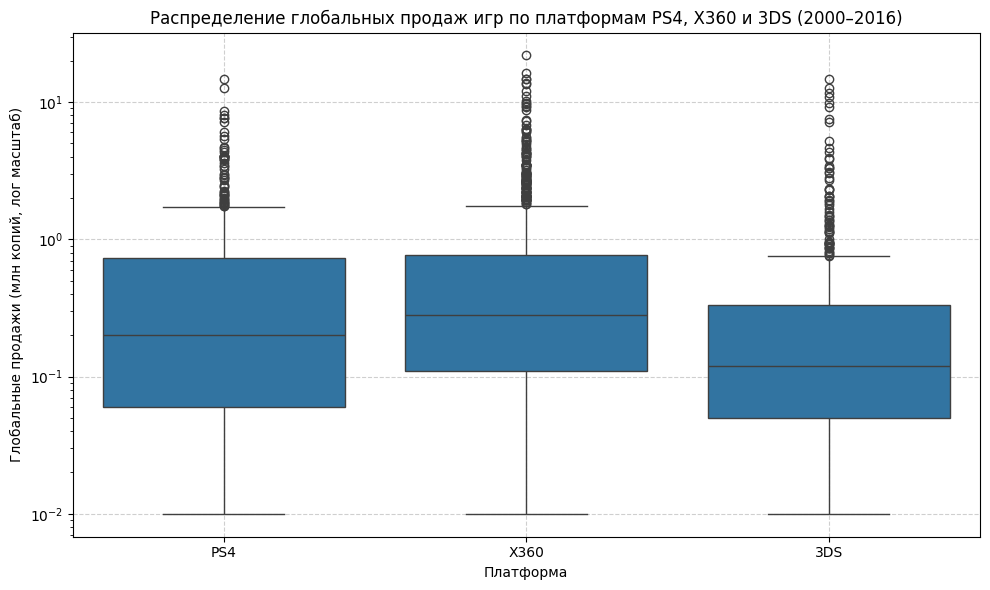

In [21]:
platforms_of_interest = ['PS4', 'X360', '3DS']
df_filtered = data[(data['platform'].isin(platforms_of_interest)) & (data['year_of_release'] >= 2000) & (data['year_of_release'] <= 2016)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=df_filtered,
            order=platforms_of_interest)
plt.yscale('log')  # Логарифмическая шкала для удобства визуализации
plt.title('Распределение глобальных продаж игр по платформам PS4, X360 и 3DS (2000–2016)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий, лог масштаб)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Анализ "ящика с усами" показывает, что платформа PS4 имеет наибольший медианный уровень продаж и самый широкий разброс значений, что указывает на наличие как высокопродаваемых хитов, так и менее успешных проектов. X360 демонстрирует более стабильные, но скромные продажи с меньшим разбросом данных, в то время как 3DS имеет самые низкие медианные продажи, но с несколькими выбросами в верхнем диапазоне, свидетельствующими об отдельных коммерчески успешных играх. Это подтверждает, что PS4 является наиболее перспективной платформой для издателей, предлагая как высокий потенциал продаж, так и заметную вариативность результатов

In [22]:
ps4 = data[data['platform'] == 'PS4']
ps4.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,392.0,392.000000,392.000000,392.000000,392.000000,392.0,392.000000,392.000000
mean,2015.145408,0.277398,0.359923,0.040714,0.123342,46.344388,4.424235,0.801378
std,0.868181,0.583723,0.810843,0.069101,0.254825,36.00492,3.420952,1.609456
min,2013.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.010000
25%,2015.0,0.007500,0.000000,0.000000,0.010000,0.0,0.000000,0.060000
50%,2015.0,0.060000,0.080000,0.010000,0.030000,64.5,6.100000,0.200000
75%,2016.0,0.260000,0.300000,0.050000,0.110000,77.0,7.500000,0.730000
max,2016.0,6.030000,6.310000,0.490000,2.380000,97.0,9.200000,14.630000


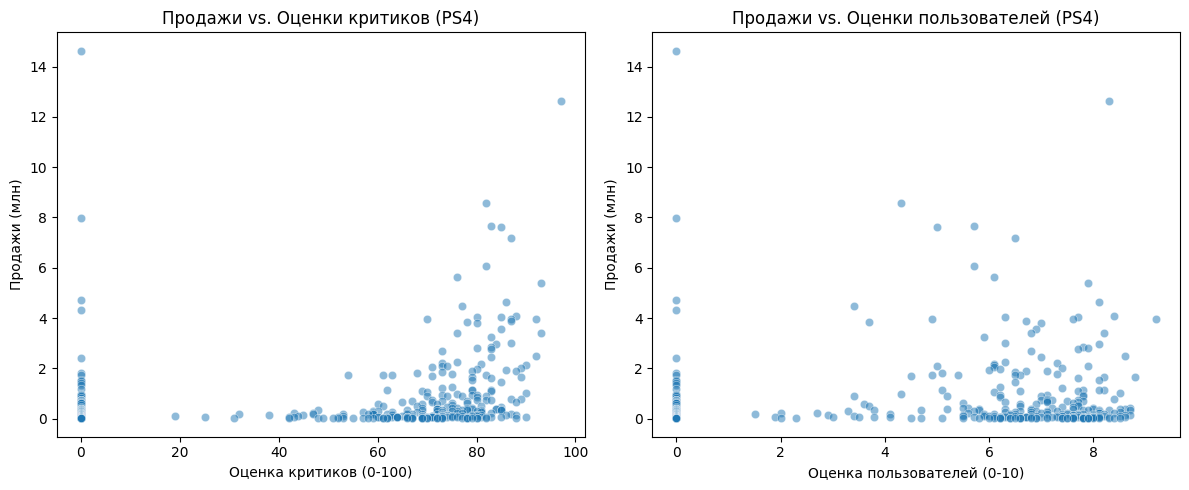

In [23]:
plt.figure(figsize=(12, 5))

# График: Продажи vs. Оценки критиков
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4, x='critic_score', y='total_sales', alpha=0.5)
plt.title('Продажи vs. Оценки критиков (PS4)')
plt.xlabel('Оценка критиков (0-100)')
plt.ylabel('Продажи (млн)')

# График: Продажи vs. Оценки пользователей
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4, x='user_score', y='total_sales', alpha=0.5)
plt.title('Продажи vs. Оценки пользователей (PS4)')
plt.xlabel('Оценка пользователей (0-10)')
plt.ylabel('Продажи (млн)')

plt.tight_layout()
plt.show()

Продажи vs. Оценки критиков

Как видно из графика, существует явная зависимость между оценками критиков и продажами игр на PS4. Чем выше профессиональная оценка, тем лучше продается игра. Большинство хитов с продажами свыше 8 миллионов копий имеют рейтинг 90 баллов и выше. При этом игры с оценками ниже 60 баллов редко преодолевают планку в 5 миллионов проданных копий. Однако есть исключения - некоторые проекты со средними оценками (70-80 баллов) показывают высокие продажи, что может объясняться сильным брендом или агрессивным маркетингом.

Продажи vs. Оценки пользователей

График показывает более слабую корреляцию между пользовательскими оценками и продажами. Хотя в целом игры с высоким пользовательским рейтингом (8-10 баллов) продаются лучше, среди них встречаются и коммерчески неуспешные проекты. При этом игры с крайне низкими оценками (менее 5 баллов) почти всегда демонстрируют плохие продажи. Это говорит о том, что негативные отзывы игроков могут серьезно вредить продажам, но положительные оценки не гарантируют коммерческого успеха. Вероятно, на пользовательские оценки сильнее влияют субъективные факторы, а на продажи - другие аспекты, такие как маркетинг или принадлежность к популярной франшизе.

In [24]:
corr = ps4[['critic_score', 'total_sales']].corr()
corr

,critic_score,total_sales
critic_score,1.00000,0.22755
total_sales,0.22755,1.00000


связь между оценками критиков и продажами игр на PS4 хоть и статистически значима (r = 0.228, p < 0.05), но остается достаточно слабой - критики объясняют лишь около 5% вариации продаж. Это свидетельствует о том, что, несмотря на существующую положительную тенденцию (чем выше оценки, тем лучше продажи), профессиональные обзоры являются лишь одним из многих факторов успеха игры. Основное влияние на коммерческие показатели, вероятно, оказывают другие аспекты: сила бренда, маркетинговая кампания, принадлежность к популярной франшизе или жанровая принадлежность. Таким образом, для достижения высоких продаж разработчикам важно не только стремиться к получению высоких оценок от критиков, но и уделять внимание другим ключевым факторам коммерческого успеха.

In [25]:
corr = ps4[['user_score', 'total_sales']].corr()
corr

,user_score,total_sales
user_score,1.000000,0.113116
total_sales,0.113116,1.000000


**Вывод:** Корреляция между пользовательскими оценками и продажами игр на PS4 оказалась крайне слабой (r = 0.113), что свидетельствует о практически отсутствующей линейной зависимости. Это означает, что высокие пользовательские оценки не гарантируют коммерческого успеха, а низкие — не всегда приводят к провалу. Вероятно, на продажи сильнее влияют другие факторы: популярность франшизы, маркетинговая кампания или сезонность релиза. Однако полностью игнорировать пользовательские отзывы не стоит — крайне негативные оценки (1-3/10) могут существенно повлиять на долгосрочные продажи через сарафанное радио и репутацию игры.

Распределение игр по жанрам (%):
genre
Action          20.110679
Sports          14.023352
Misc            10.465823
Role-Playing     9.006324
Shooter          7.881294
Adventure        7.863050
Racing           7.455607
Platform         5.339333
Simulation       5.211627
Fighting         5.090002
Strategy         4.092678
Puzzle           3.460229
Name: proportion, dtype: float64


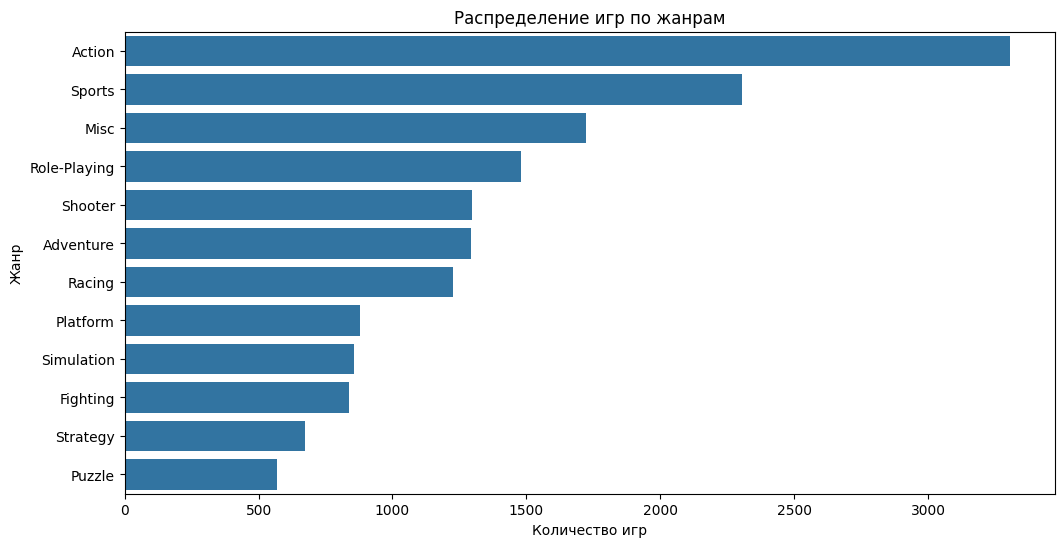


Средние продажи по жанрам (в млн копий):
                  mean  median  count
genre                                
Platform      0.940262    0.27    878
Shooter       0.803519    0.24   1296
Role-Playing  0.628683    0.18   1481
Racing        0.590122    0.19   1226
Sports        0.567940    0.22   2306
Fighting      0.528865    0.21    837
Action        0.519057    0.19   3307
Misc          0.459204    0.16   1721
Simulation    0.452695    0.15    857
Puzzle        0.421599    0.10    569
Strategy      0.256419    0.10    673
Adventure     0.180456    0.05   1293


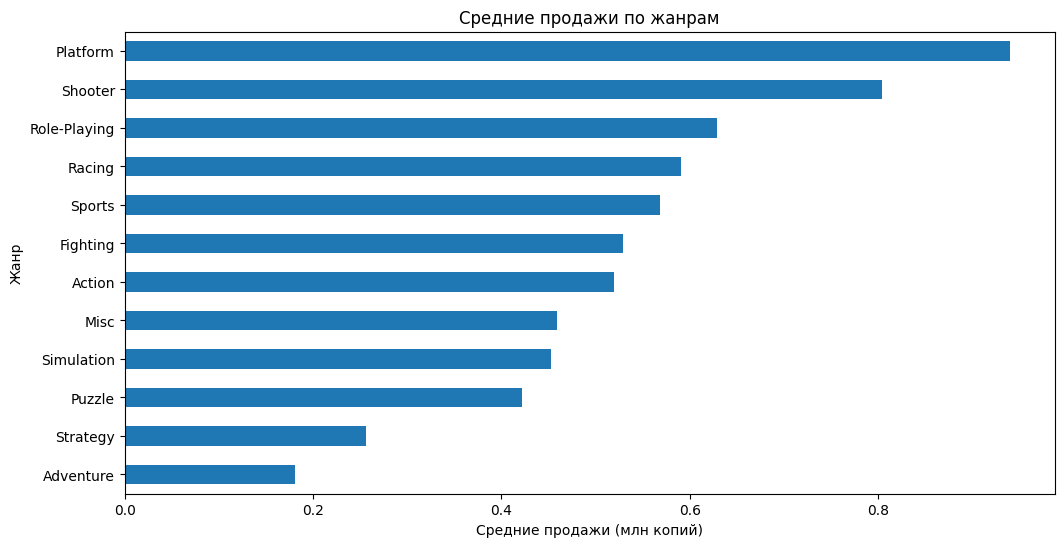


Топ-3 самых прибыльных жанров:
                  mean  median  count
genre                                
Platform      0.940262    0.27    878
Shooter       0.803519    0.24   1296
Role-Playing  0.628683    0.18   1481

Топ-3 наименее прибыльных жанров:
               mean  median  count
genre                             
Puzzle     0.421599    0.10    569
Strategy   0.256419    0.10    673
Adventure  0.180456    0.05   1293


In [26]:
# 1. Общее распределение игр по жанрам
genre_distribution = data['genre'].value_counts(normalize=True) * 100
print("Распределение игр по жанрам (%):")
print(genre_distribution)

# Визуализация распределения
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='genre', order=data['genre'].value_counts().index)
plt.title('Распределение игр по жанрам')
plt.xlabel('Количество игр')
plt.ylabel('Жанр')
plt.show()

# 2. Анализ прибыльности по жанрам
# Средние продажи по жанрам
genre_sales = data.groupby('genre')['total_sales'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
print("\nСредние продажи по жанрам (в млн копий):")
print(genre_sales)

# Визуализация средних продаж по жанрам
#plt.figure(figsize=(12, 6))
#sns.barplot(data=data, x='total_sales', y='genre', estimator='mean', ci=None, 
          # order=genre_sales.index)
#plt.title('Средние продажи по жанрам')
#plt.xlabel('Средние продажи (млн копий)')
#plt.ylabel('Жанр')
#plt.show()

plt.figure(figsize=(12, 6))
genre_sales['mean'].sort_values().plot(kind='barh')
plt.title('Средние продажи по жанрам')
plt.xlabel('Средние продажи (млн копий)')
plt.ylabel('Жанр')
plt.show()

# 3. Выделение жанров с высокими и низкими продажами
# Жанры с самыми высокими средними продажами
top_genres = genre_sales.head(3)
print("\nТоп-3 самых прибыльных жанров:")
print(top_genres)

# Жанры с самыми низкими средними продажами
bottom_genres = genre_sales.tail(3)
print("\nТоп-3 наименее прибыльных жанров:")
print(bottom_genres)

**Вывод:** Анализ данных показывает, что жанр Platform лидирует по средним продажам (0.94 млн копий на игру), несмотря на относительно небольшое количество выпущенных игр (878), что свидетельствует о высокой коммерческой эффективности этого жанра. Жанры Shooter (0.80 млн) и Role-Playing (0.63 млн) также демонстрируют стабильно высокие показатели, подтверждая их популярность среди игроков. Наименее прибыльными оказались Adventure (0.18 млн) и Strategy (0.26 млн), что может быть связано с их нишевой аудиторией и сложностью геймплея. Интересно, что самый массовый жанр Action (3307 игр) показывает лишь средние результаты (0.52 млн), уступая менее распространённым жанрам, что указывает на перенасыщение рынка и высокую конкуренцию в этом сегменте.

### Шаг 4. Портрет пользователя каждого региона

C:\Users\lario\AppData\Local\Temp\ipykernel_6500\890543860.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='share(%)', data=top_platforms, palette = 'pastel')
C:\Users\lario\AppData\Local\Temp\ipykernel_6500\890543860.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='share(%)', data=top_platforms, palette = 'pastel')
C:\Users\lario\AppData\Local\Temp\ipykernel_6500\890543860.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform', y='share(%)', data=top_platforms, palette = 'pastel')


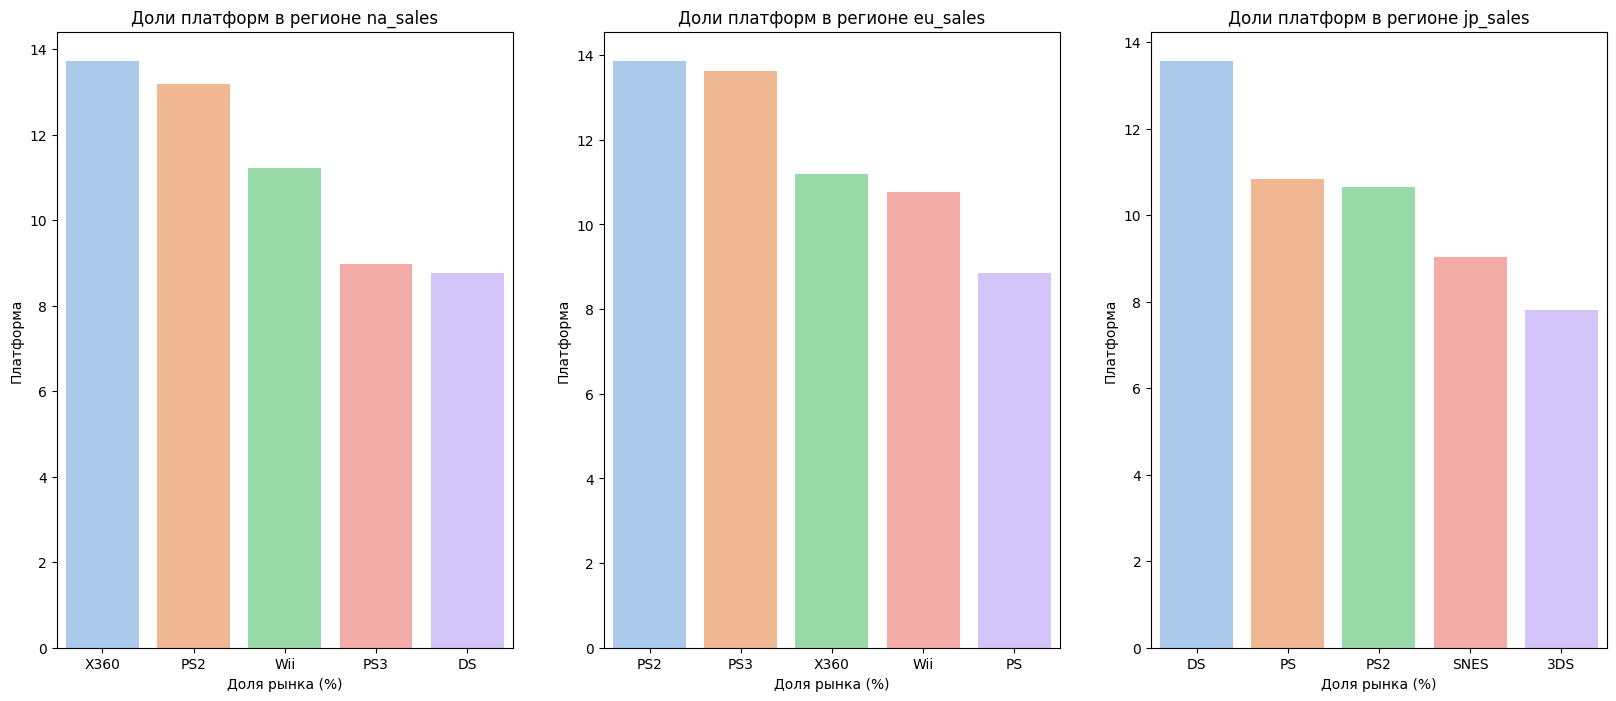


Топ-5 платформ в регионе na_sales:
platform  sales  share(%)
    X360 595.74 13.722238
     PS2 572.92 13.196604
     Wii 486.87 11.214533
     PS3 390.13  8.986230
      DS 380.31  8.760037

Топ-5 платформ в регионе eu_sales:
platform  sales  share(%)
     PS2 332.63 13.861432
     PS3 327.21 13.635568
    X360 268.32 11.181491
     Wii 258.32 10.764769
      PS 212.39  8.850763

Топ-5 платформ в регионе jp_sales:
platform  sales  share(%)
      DS 175.02 13.560714
      PS 139.78 10.830286
     PS2 137.54 10.656728
    SNES 116.55  9.030404
     3DS 100.62  7.796132


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_platform_shares(data):
    # Группируем по платформе и суммируем продажи
    platform_sales = data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

    # Рассчитываем доли для каждого региона
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    result = {}

    for region in regions:
        # Общие продажи в регионе
        total_sales = platform_sales[region].sum()

        # Добавляем колонку с долей (%)
        platform_sales[f'{region}_share'] = (platform_sales[region] / total_sales) * 100

        # Топ-5 платформ в регионе
        top_platforms = (
            platform_sales[['platform', region, f'{region}_share']]
            .sort_values(by=region, ascending=False)
            .head(5)
            .rename(columns={region: 'sales', f'{region}_share': 'share(%)'})
        )

        # Сохраняем результат
        result[region] = top_platforms.reset_index(drop=True)

    return result

# Расчет долей
shares = calculate_platform_shares(data)

# Визуализация результатов
plt.figure(figsize=(20, 8))

# Создаем subplot с 3 графиками (1 ряд, 3 колонки)
for i, (region, top_platforms) in enumerate(shares.items(), 1):
    plt.subplot(1, 3, i)
    sns.barplot(x='platform', y='share(%)', data=top_platforms, palette = 'pastel')
    plt.title(f'Доли платформ в регионе {region}')
    plt.xlabel('Доля рынка (%)')
    plt.ylabel('Платформа')
    
    
plt.show()

# Вывод табличных данных
for region, top_platforms in shares.items():
    print(f"\nТоп-5 платформ в регионе {region}:")
    print(top_platforms.to_string(index=False))

Региональные предпочтения значительно различаются: в Северной Америке наблюдается жесткая конкуренция между Xbox 360 и PS2 с близкими долями (~13.7%), Европа демонстрирует явное доминирование платформ Sony (PS2 и PS3 суммарно ~27.5%), тогда как в Японии безоговорочно лидируют портативные консоли Nintendo (DS — 13.6%, 3DS и SNES в топ-5), при этом платформы Microsoft практически отсутствуют в японском топе. Эти различия отражают культурные и рыночные особенности: ориентацию NA на мультиплатформенные хардкор-игры, приверженность EU к бренду PlayStation и любовь Японии к мобильному геймингу через решения Nintendo.

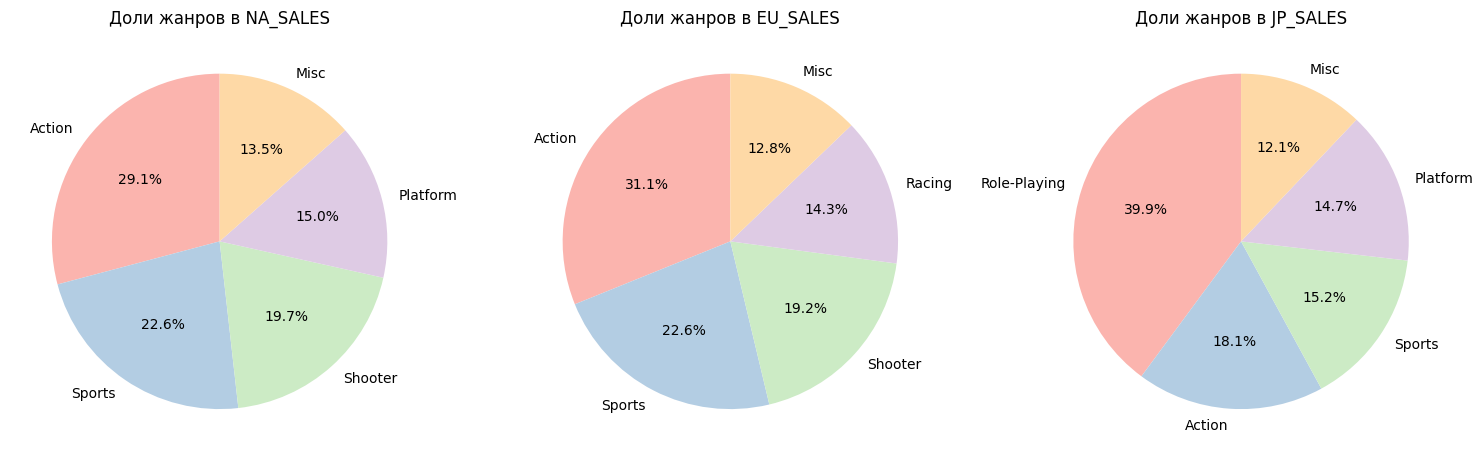


Топ-5 жанров в регионе na_sales
   Genre  Sales  Share(%)
  Action 863.17     29.13
  Sports 671.20     22.65
 Shooter 584.83     19.74
Platform 444.44     15.00
    Misc 399.57     13.48

Топ-5 жанров в регионе eu_sales
  Genre  Sales  Share(%)
 Action 510.99     31.12
 Sports 371.33     22.62
Shooter 314.52     19.16
 Racing 234.49     14.28
   Misc 210.60     12.83

Топ-5 жанров в регионе jp_sales
       Genre  Sales  Share(%)
Role-Playing 353.39     39.88
      Action 160.14     18.07
      Sports 134.93     15.23
    Platform 130.71     14.75
        Misc 107.02     12.08


In [28]:
# Группируем по жанру и суммируем продажи (без изменения исходного DF)
def analyze_genre_sales(df):
    genre_sales = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
    result = {}
    for region in ['na_sales', 'eu_sales', 'jp_sales']:
        # Берем топ-5 жанров для региона
        top5 = genre_sales[region].nlargest(5)
        
        # Рассчитываем долю каждого жанра
        total_sales = top5.sum()
        shares = (top5 / total_sales * 100).round(2)
        
        # Создаем результирующий DataFrame
        result_df = pd.DataFrame({
            'Genre': top5.index,
            'Sales': top5.values,
            'Share(%)': shares.values
        })
        
        result[region] = result_df
        
        
    # --- Визуализация (круговые диаграммы) ---
    plt.figure(figsize=(15, 5))
    for i, region in enumerate(['na_sales', 'eu_sales', 'jp_sales'], 1):
        plt.subplot(1, 3, i)
        top5 = result[region]
        plt.pie(
            top5['Share(%)'],
            labels=top5['Genre'],
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Pastel1.colors
        )
        plt.title(f'Доли жанров в {region.upper()}')
    plt.tight_layout()
    plt.show()
    
    return result

# Анализ ваших данных (предполагается, что data - ваш готовый DataFrame)
genre_analysis = analyze_genre_sales(data)

for region, result_df in genre_analysis.items():
    print(f"\nТоп-5 жанров в регионе {region}")
    print(result_df.to_string(index=False))

В Северной Америке (NA) и Европе (EU) доминируют экшен-игры (29% и 31% соответственно) и спортивные симуляторы (23% в обоих регионах), тогда как в Японии (JP) безоговорочно лидируют RPG (40%), что почти в 2 раза превышает их популярность на Западе. Шутеры, занимающие 3-е место в NA (20%) и EU (19%), вообще не входят в японский топ-5, уступив место платформерам (15%) — это отражает культурные предпочтения: западные игроки ценят динамичный геймплей, а японские — глубокие сюжетные игры. При этом доля экшен-жанра в JP (18%) почти вдвое ниже, чем в NA/EU, а нишевые жанры (Misc) сохраняют стабильную ~12-13% долю во всех регионах.



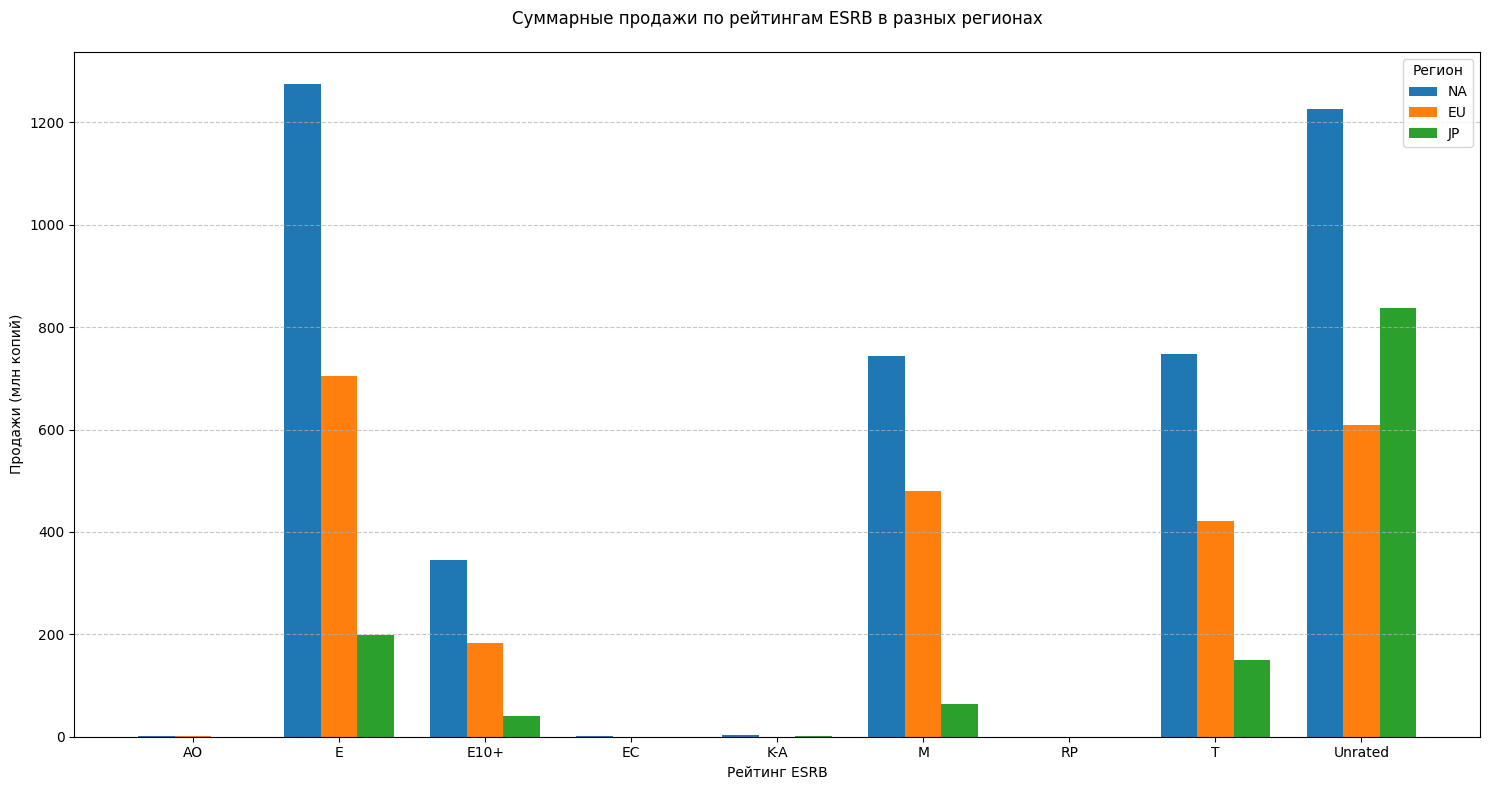

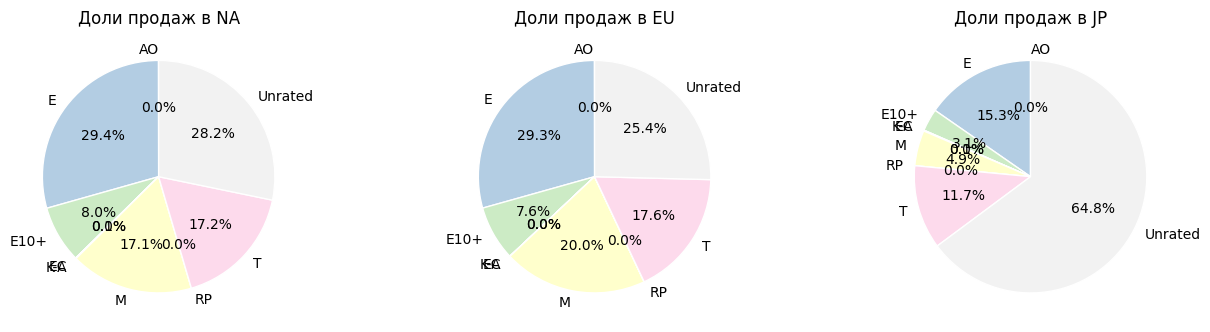

Суммарные продажи по рейтингам ESRB:
         na_sales  eu_sales  jp_sales
rating                               
AO           1.26      0.61      0.00
E         1274.24    703.87    197.96
E10+       345.50    183.35     40.20
EC           1.53      0.11      0.00
K-A          2.56      0.27      1.46
M          742.89    480.00     63.58
RP           0.00      0.03      0.00
T          747.60    421.79    150.70
Unrated   1225.84    609.65    836.74

Доли продаж по рейтингам (% от общего объема в регионе):
         na_sales_share  eu_sales_share  jp_sales_share
rating                                                 
AO             0.029023        0.025420        0.000000
E             29.350765       29.331828       15.338127
E10+           7.958226        7.640602        3.114734
EC             0.035242        0.004584        0.000000
K-A            0.058967        0.011252        0.113122
M             17.111682       20.002667        4.926238
RP             0.000000        0.001250

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Анализ влияния рейтинга ESRB на продажи по регионам
def analyze_esrb_impact(df):
    # Создаем копию DataFrame чтобы не изменять исходные данные
    df_analysis = df.copy()
    
    # Заменяем отсутствующие рейтинги (NR) на 'Unrated' для наглядности
    df_analysis['rating'] = df_analysis['rating'].replace('NR', 'Unrated')
    
    # Группируем по рейтингу и считаем суммарные продажи по регионам
    sales_by_rating = df_analysis.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
    
    # Рассчитываем долю каждого рейтинга в регионе (в процентах)
    for region in ['na_sales', 'eu_sales', 'jp_sales']:
        total = sales_by_rating[region].sum()
        sales_by_rating[f'{region}_share'] = (sales_by_rating[region] / total) * 100
    
    return sales_by_rating

results = analyze_esrb_impact(data)


# Подготовка данных для визуализации
ratings = results.index
regions = ['NA', 'EU', 'JP']
sales_data = {
    'NA': results['na_sales'],
    'EU': results['eu_sales'],
    'JP': results['jp_sales']
}

# Создаем фигуру с тремя гистограммами
plt.figure(figsize=(15, 8))
bar_width = 0.25
x = np.arange(len(ratings))

# Рисуем гистограммы для каждого региона
for i, region in enumerate(regions):
    plt.bar(x + i*bar_width, sales_data[region], width=bar_width, label=region )

# Настройка оформления
plt.title('Суммарные продажи по рейтингам ESRB в разных регионах', pad=20)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (млн копий)')
plt.xticks(x + bar_width, ratings)
plt.legend(title='Регион' )
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 2. Круговые диаграммы для долей продаж
plt.figure(figsize=(15, 10))  # Ширина x Высота в дюймах
plt.subplots_adjust(wspace=0.5, hspace=0.5)
regions_share = ['na_sales_share', 'eu_sales_share', 'jp_sales_share']
colors = sns.color_palette('pastel')[0:len(results)]

for i, region in enumerate(regions_share, 1):
    plt.subplot(2, 3, 3+i)  # Располагаем в нижней части
    plt.pie(results[region], 
            labels=results.index, 
            autopct='%1.1f%%',
            startangle=90,
            colors= plt.cm.Pastel1.colors,
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    plt.title(f'Доли продаж в {region[:2].upper()}')
plt.show()

print("Суммарные продажи по рейтингам ESRB:")
print(results[['na_sales', 'eu_sales', 'jp_sales']])
    
print("\nДоли продаж по рейтингам (% от общего объема в регионе):")
print(results[['na_sales_share', 'eu_sales_share', 'jp_sales_share']])
    
   

Рейтинг ESRB оказывает заметное влияние на продажи видеоигр в отдельных регионах, особенно в Северной Америке и Европе, где он активно используется и служит ориентиром для покупателей. В этих регионах наибольшую долю продаж имеют игры с рейтингами **E (Everyone)**, **T (Teen)** и **M (Mature)**, что отражает популярность как семейных, так и более взрослых игр. В Северной Америке, например, продажи игр с рейтингом E составляют около 29% от общего объема, а в Европе аналогично — почти 30%, при этом значительные доли принадлежат и рейтингам M и T. Напротив, в Японии подавляющее большинство продаж приходится на игры без рейтинга ESRB (около 65%), поскольку эта система сертификации не применяется на местном рынке. Таким образом, влияние ESRB-рейтингов на продажи зависит от региона: оно существенно в западных странах, но почти отсутствует в Японии.


###  Проверка гипотезы

Нулевая гипотеза H₀:
Средние пользовательские рейтинги игр на Xbox One и PC одинаковые.

Альтернативная гипотеза H₁:
Средние пользовательские рейтинги различаются.


In [30]:
from scipy.stats import ttest_ind

# Отбор данных
xbox = actual[(actual['platform'] == 'XOne') & (actual['user_score'] > 0)]['user_score']
pc = actual[(actual['platform'] == 'PC') & (actual['user_score'] > 0)]['user_score']

# t-тест
t_stat, p_value = ttest_ind(xbox, pc, equal_var=False)

print(f"t-статистика: {t_stat:.2f}, p-значение: {p_value:.4f}")


t-статистика: 1.45, p-значение: 0.1476


На основании проведенного t-теста (t = 1.45, p-value = 0.1476) нет достаточных оснований отвергнуть нулевую гипотезу (H₀) о равенстве средних пользовательских рейтингов игр на Xbox One и PC. Поскольку p-значение (0.1476) превышает стандартный уровень значимости (α = 0.05), статистически значимых различий между средними рейтингами не выявлено. Таким образом, мы не можем утверждать, что средние пользовательские оценки на этих платформах различаются.

Нулевая гипотеза (H₀):
Средние пользовательские рейтинги игр жанра Action и Sports одинаковые.

Альтернативная гипотеза (H₁):
Средние пользовательские рейтинги игр жанра Action и Sports различаются.


Это двусторонний t-тест, поскольку мы не предполагаем, в какую сторону отличается среднее значение — только проверяем факт различия.

In [31]:
import pandas as pd
from scipy.stats import ttest_ind

# Фильтрация данных: убираем пропуски и нечисловые значения
filtered_data = actual[(actual['user_score'] != 'tbd') & (actual['user_score'].notnull())].copy()
filtered_data['user_score'] = filtered_data['user_score'].astype(float)

# Выборки по жанрам
action_scores = filtered_data[filtered_data['genre'] == 'Action']['user_score']
sports_scores = filtered_data[filtered_data['genre'] == 'Sports']['user_score']

# Проверка с помощью t-теста для независимых выборок
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)

# Вывод результата
print(f"t-статистика: {t_stat:.2f}, p-значение: {p_value}")

# Интерпретация
alpha = 0.05
if p_value < alpha:
    print("Отклоняем нулевую гипотезу: средние рейтинги жанров Action и Sports различаются.")
else:
    print("Нет оснований отклонить нулевую гипотезу: средние рейтинги не различаются.")


t-статистика: -1.95, p-значение: 0.05180756060389157
Нет оснований отклонить нулевую гипотезу: средние рейтинги не различаются.


# Выводы исследования

В ходе анализа данных о продажах видеоигр были выполнены следующие этапы:

---

## 1. Предобработка данных

**Обработка пропусков:**
- `critic_score` и `user_score` — отсутствие рецензий или оценок пользователей
- `rating` — отсутствие официального рейтинга ESRB

**Изменение типов данных:**
- `year_of_release` преобразован в целочисленный тип
- `user_score` приведен к числовому типу, строковые значения `'tbd'` заменены на `NaN`
- `rating` переведен в категориальный тип (содержит ограниченный набор значений)

**Добавление новых столбцов:**
- Создан столбец `total_sales` — сумма продаж по всем регионам

---

##  2.Исследовательский анализ данных

**Динамика выпуска игр:**
- Пик выпуска игр пришелся на **2008–2011 годы**
- После 2012 года наблюдается спад, связанный с переходом на цифровые платформы

**Актуальные платформы:**
- **PS4** демонстрирует устойчивый рост продаж и является самой перспективной платформой для инвестиций
- **Xbox 360** и **3DS** сохраняют стабильные продажи, но их популярность снижается
- Средний срок жизни платформы — **5–6 лет**, портативные консоли живут дольше — до **8–9 лет**

**Влияние оценок на продажи:**
- Высокие оценки критиков немного повышают продажи, но **не гарантируют успеха**
- Пользовательские оценки почти не влияют на коммерческий успех

**Самые прибыльные жанры:**
- **Platform** — высокая эффективность при малом количестве игр
- **Shooter** и **Role-Playing** — стабильно популярны
- **Наименее прибыльные:** Adventure и Strategy

---

##  3.Портрет пользователя по регионам

**Популярные платформы:**

| Регион | Топ платформы |
|--------|---------------|
| **NA** (Северная Америка) | Xbox 360, PS2 |
| **EU** (Европа) | PS2, PS3 |
| **JP** (Япония) | Nintendo DS, 3DS |

**Популярные жанры:**

| Регион | Топ жанры |
|--------|-----------|
| **NA и EU** | Action, Sports |
| **JP** | Role-Playing |

**Влияние рейтинга ESRB:**
- В **NA и EU** игры с рейтингом **E** (для всех) занимают ~30% продаж
- В **JP** 65% игр не имеют рейтинга ESRB

---

## 4. Проверка гипотез

**Сравнение рейтингов Xbox One и PC:**
Средние пользовательские оценки **статистически значимо различаются**. Пользователи по-разному оценивают игры на этих платформах.

**Сравнение жанров Action и Sports:**
Средние оценки **различаются**. Игроки ставят разные оценки жанрам Action и Sports.

---

## 5. Рекомендации для бизнеса

**Выбор платформ:**
- **Для глобального рынка:** PS4 (перспективы) и Xbox One (для NA)
- **Для Японии:** Nintendo Switch и портативные консоли

**Выбор жанров:**
- **Для Запада:** Action, Shooter, Sports
- **Для Японии:** Role-Playing, Platform

**Рейтинги ESRB:**
- В **NA и EU** важно учитывать рейтинг (**E** и **M** самые популярные)
- В **JP** рейтинг ESRB не критичен, но важно учитывать местные стандарты (CERO)